Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

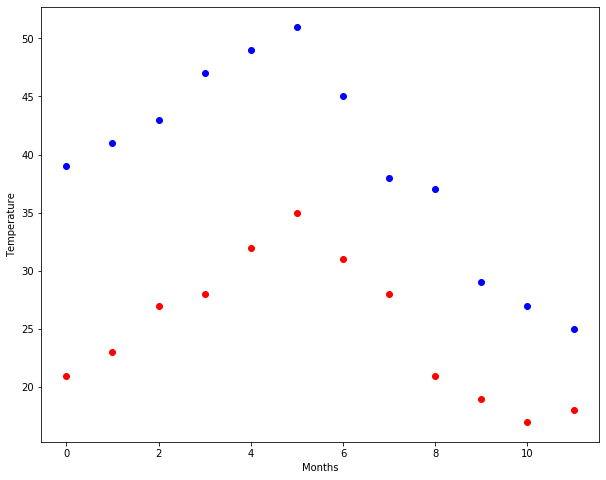

In [2]:
max_temp=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)

plt.figure(figsize=(10,8))
plt.plot(months,max_temp,'bo')
plt.plot(months,min_temp,'ro')
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.show()

In [3]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_temp, [55, 15, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_temp, [35, 10, 0])


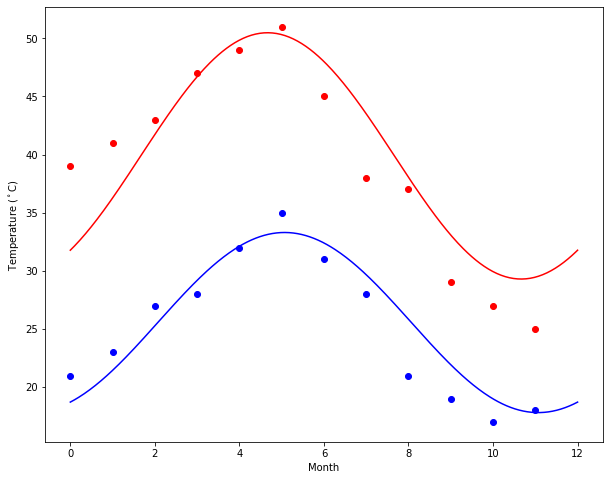

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(10,8))
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)
titanic.describe() # Genearate descriptive statistics


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


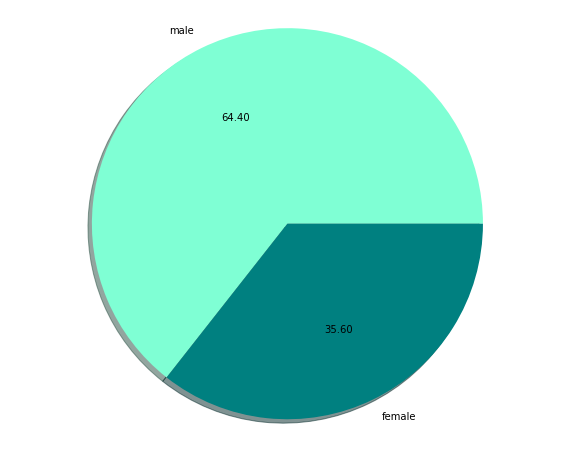

In [6]:
# 1. Create a pie chart presenting the male/female proportion

# Solution 1 -
proportion = round(titanic['sex'].value_counts()/len(titanic)*100,2)

plt.figure(figsize=(10,8))

labels='male','female'
sizes = proportion
colors=['aquamarine','teal']       
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.2f',shadow= True)
plt.axis('equal')
plt.show()

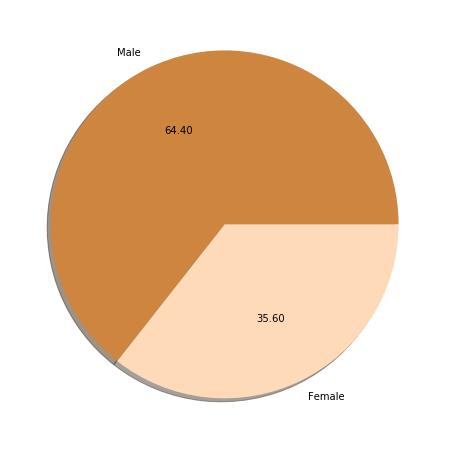

In [7]:
 # Solution 2 

plt.figure(figsize=(10,8))
plt.pie(x=proportion,labels=['Male','Female'],colors=['peru','peachpuff'],autopct='%1.2f',shadow= True)
plt.show()

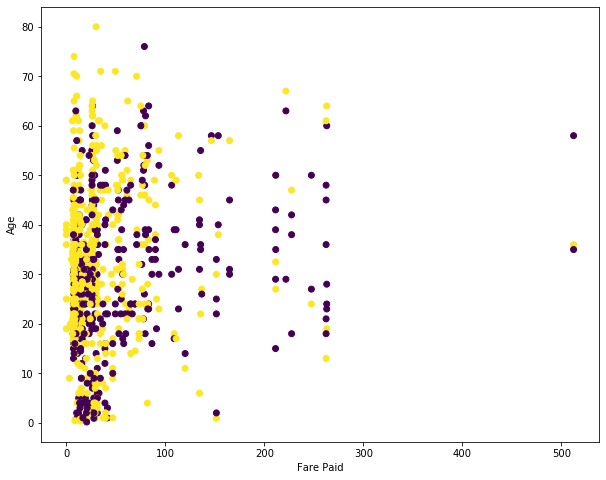

In [8]:
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
# Solution 1 
gender = pd.factorize(titanic['sex'])[0]

plt.figure(figsize=(10,8))

plt.scatter(x='fare',y='age',data=titanic,c=gender,edgecolors='face')
plt.xlabel('Fare Paid')
plt.ylabel('Age')
plt.show()

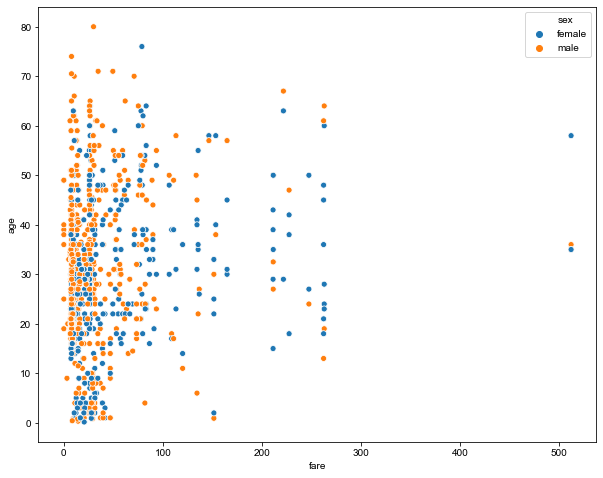

In [9]:
# Solution 2 
# Using seaborn

plt.figure(figsize=(10,8))
sns.scatterplot(x='fare',y='age',data=titanic,hue='sex')
sns.set(style='darkgrid')